In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def func(x1, x2):
    return x1**2 + 2 * x2**2

def func_grad(x1, x2):
    return (2*x1, 4*x2)

In [2]:
class Optimizers:
    
    def __init__(self, lr_schedule):
        self.lr_schedule = lr_schedule
  
    def lr(self, rate , t):
        if self.lr_schedule == "constant":
            return self.constant_lr(rate)
        elif self.lr_schedule == "power":
            return self.power_lr(rate, t)

    def constant_lr(self, rate):
        return rate
    
    def power_lr(self, rate, t):
        c = 1
        s = 10
        return rate/(1 + t/s)**c
    def nesterov_rmsprop(self, x1, x2, v1, v2,r1,r2, func_grad , rate , t):
        
    
    def nesterov_rmsprop_with_momentum(self, x1, x2, v1, v2,r1,r2, func_grad , rate , t):
        delta = 1e-7
        rho = 0.9
        alpha=0.9
        x1 += alpha*v1
        x2 += alpha*v2
        gr_x1, gr_x2 = func_grad(x1, x2)
        r1 = r1*rho + (1-rho)*gr_x1**2
        r2 = r2*rho + (1-rho)*gr_x2**2
        v1 = alpha*v1 - self.lr(rate, t)/np.sqrt(delta+r1)*gr_x1
        v2 = alpha*v2 - self.lr(rate, t)/np.sqrt(delta+r2)*gr_x2
        return x1 + v1, x2 + v2, v1, v2 , r1 , r2


In [3]:
def search_rsmsprop(optimizer, func_grad, rate, iteration=20):
    x1, x2, r1, r2 , v1, v2 = -5, -2, 0, 0 ,0 , 0
    x_iterations = [(x1, x2)]
    for i in range(iteration):
        x1, x2, r1, r2 , v1 , v2 = optimizer(x1, x2, r1, r2 , v1, v2, func_grad, rate, i+1)
        x_iterations.append((x1, x2))
    print("epoch {}, x1:{}, x2:{}".format(i+1, x1, x2))
    return x_iterations

In [4]:
def search_path(func, x_iterations):
    plt.plot(*zip(*x_iterations), "-o", color="r")
    x1, x2 = np.meshgrid(np.arange(-5.5, 5.5, 0.1), np.arange(-5.5, 5.5, 0.1))
    plt.contourf(x1, x2, func(x1, x2))
    plt.xlabel("x1")
    plt.ylabel("x2")

epoch 20, x1:0.9672529649457138, x2:-0.5325170964995609


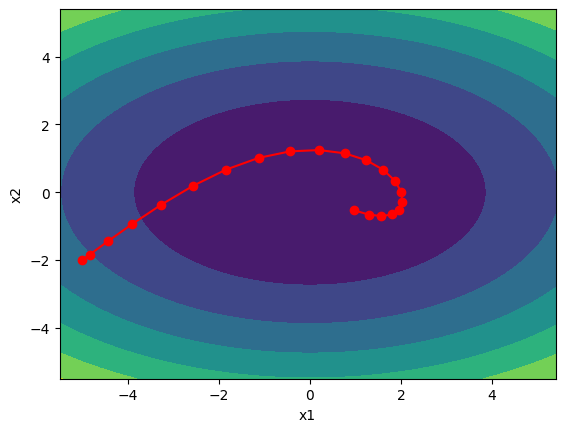

In [9]:
opt = Optimizers("constant")
search_path(func, search_rsmsprop(opt.nesterov_rmsprop_with_momentum, func_grad , 0.05))